Music is a passion I cannot live without; it motivates me, and let's me get through the day. I feel as it is an indenspensable resource for the soul, and serves as a medicine for the hardships in life. Anways, I also love spotify. Spotify is a service I use all the time, and I've noticed that I often listen to German Music. That got me thinking; just how different is the music in germany and the U.S? 

To perform this task I looked at the top10 songs for the U.S and Germany from 2017 onwards using the Spotipy, a library that allows me to extract music features. The features I will be looking at are danceability, energy, key, loudness, mode, speechines, acousticness, instrumentalness, liveliness, valence and tempo.

Scraping the Data:

In [430]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
cid = "58ff3ad8fc2446669ee16d1a75185ba8"
secret = "85504b94651641a7ad56602bfac5eab9"
client_credentials_managerMan = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_managerMan)

In [431]:
#chart I am using
spotifySongs = pd.read_csv("charts.csv")
SpotifyDataSong = pd.DataFrame(spotifySongs)

#getting rid of repeats
newEntry_df = spotifySongs[spotifySongs["trend"] == "NEW_ENTRY"]
#getting songs in the US region
america_df = newEntry_df[spotifySongs["region"] == "United States"]
#getting songs in German Region
german_df = newEntry_df[spotifySongs["region"] == "Germany"]
#making sure that songs are rank 10 or less
america_df = america_df[america_df["rank"] <= 10]
japan_df = japan_df[japan_df["rank"] <= 10]
spotifySongs = spotifySongs[spotifySongs["trend"] == "NEW_ENTRY"]


/tmp/ipykernel_3385/2566571241.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  america_df = newEntry_df[spotifySongs["region"] == "United States"]
/tmp/ipykernel_3385/2566571241.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  german_df = newEntry_df[spotifySongs["region"] == "Germany"]


NameError: name 'japan_df' is not defined

In [ ]:
#getting the top 200 songs; the data set also includes top50
america_df = america_df[america_df["chart"] == "top200"]
german_df = german_df[german_df["chart"] == "top200"]
german_df

In [433]:
#getting the data
def getData(region_df):
    #initializing data frame with url
    element = region_df.head(1)["url"]
    firstTrack = sp.audio_features(element)
    #sp.audio_features returns an array of 1 element
    print(firstTrack[0].keys())
    df = pd.DataFrame(columns = firstTrack[0].keys())

    for index,element in region_df.iterrows():
        url = element["url"]
        rank = element["rank"]
        region = element["region"]
        chart = element["chart"]
        trend = element["trend"]
        streams = element["streams"]
        artist =  element["artist"]
        title =  element["title"]
        date =  element["date"]
        mytrack = sp.audio_features(url)[0]
        df2 = pd.DataFrame(mytrack, index=[0])

        #pd.concat([element, df2])
        #df.concat(e
        df2["rank"] = rank
        df2["artist"] = artist
        df2["title"] = title
        df2["date"] = date
        df2["chart"] = chart
        df2["trend"] = trend
        df2["streams"] = streams
        df2["region"] = region
        df = df.append(df2, ignore_index = True)
        
    return df

In [434]:
#since my dataset does not have the genre for the uri, I 
#took the liberty of collecting the data
def get_genre(df):
    df_ret = pd.DataFrame()
    for index,element in df.iterrows():
        url = element["url"]
        result = sp.search(url)
        track = result['tracks']['items'][0]
        artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
        genre = artist["genres"][0]
        element["genre"] = genre
        element["artist"] = artist
        df_ret.append(element, ignore_index = True)
    return df_ret

In [ ]:
#getting the data
america_df_final= getData(america_df)
german_df_final = getData(german_df)
get_genre(america_df_final)
get_genre(german_df_final)

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


/tmp/ipykernel_3385/4182483107.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
/tmp/ipykernel_3385/4182483107.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
/tmp/ipykernel_3385/4182483107.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
/tmp/ipykernel_3385/4182483107.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
/tmp/ipykernel_3385/4182483107.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
japan_df_final

In [ ]:
america_df_final

In [25]:
#compression_opts = dict(method='zip',
 #                       archive_name='out.csv')  
#america_df_final.to_csv('usa.zip', index=False,
 #         compression=compression_opts)  
#german_df_final.to_csv('german.zip', index=False,
 #         compression=compression_opts)


NameError: name 'japan_df_final' is not defined

Here, I will be plotting the features of the songs, to see if the popularity of a song is affected by particular features. Since we are looking at the top 10 songs, technically all of these songs are popular, but there is still variablity in the top 10.

In [409]:
#normalize the data for the scatter plot
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [410]:
#9 lines
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import seaborn as sns
x_array = np.array([2,3,5,6,7,4,8,7,6])
normalized_arr = preprocessing.normalize([x_array])
import statsmodels.formula.api as sm
#get linear regression model
lm = linear_model.LinearRegression()

#plot the data
def plot(df, name, p1):
    #here I put a "rank2" so the higher values will be on the right for the scatter plot
    df["rank2"] = df["rank"] * -1 + 10
    #print(df [df["rank2"] < 2])
    standardized = NormalizeData(df["rank2"]).values
    standardized = df["rank2"].values
    Y = np.asarray(standardized).reshape(-1,1)
    if (p1 == "danceability"):
        X = np.array(df["danceability"].values).reshape(-1,1)
    elif (p1 == "energy"):
        print("entered")
        X = np.array(df["energy"].values).reshape(-1,1)  
    elif (p1 == "loudness"):
         X = np.array(df["loudness"].values).reshape(-1,1)  
    else:
        X = np.array(df["danceability"].values).reshape(-1,1)
    
    plt.scatter(Y,X)
    #plt.plot(X, model.predict(X), color = "red")
    plt.title(name)
    plt.show()

   

In [426]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
cid = "58ff3ad8fc2446669ee16d1a75185ba8"
secret = "85504b94651641a7ad56602bfac5eab9"
client_credentials_managerMan = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_managerMan)

#spoof = pd.read_csv("usa2.csv")
america_df_final = america_df_final.sample(500)
germany_df_final = germany_df_final.sample(500)
plot(america_df_final, "dancebility in the USA","danceability")
sns.violinplot(x= "rank", y = "dancebility", data = america_df_final)



NameError: name 'germany_df_final' is not defined

In [ ]:
plot(germany_df_final, "dancebility in the USA","danceability")
sns.violinplot(x= "rank", y = "energy", data = germany_df_final)

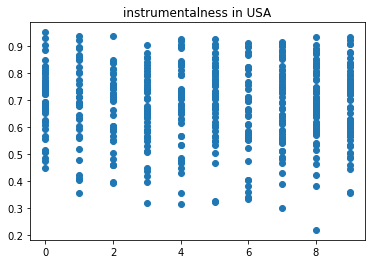

<AxesSubplot:xlabel='rank', ylabel='instrumentalness'>

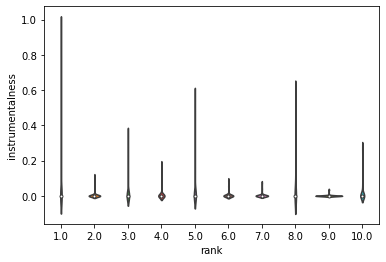

In [416]:
plot(america_df_final, "instrumentalness in USA","instrumentalness")
sns.violinplot(x= "rank", y = "instrumentalness", data = america_df_final)



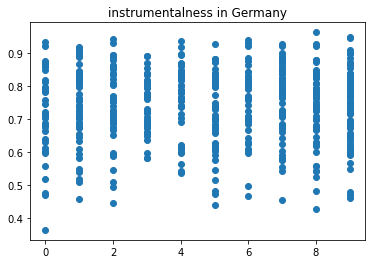

<AxesSubplot:xlabel='rank', ylabel='instrumentalness'>

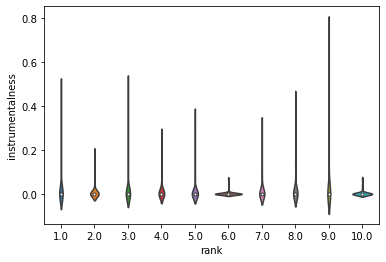

In [425]:
plot(german_df_final, "instrumentalness in Germany","instrumentalness")
sns.violinplot(x= "rank", y = "instrumentalness", data = german_df_final)



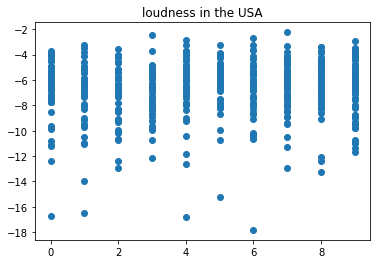

<AxesSubplot:xlabel='rank', ylabel='loudness'>

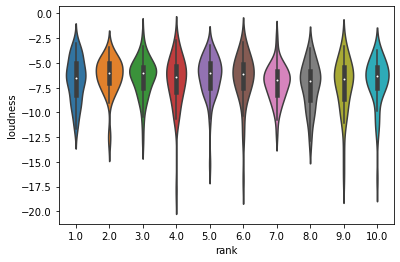

In [417]:
plot(america_df_final, "loudness in the USA","loudness")
sns.violinplot(x= "rank", y = "loudness", data = america_df_final)



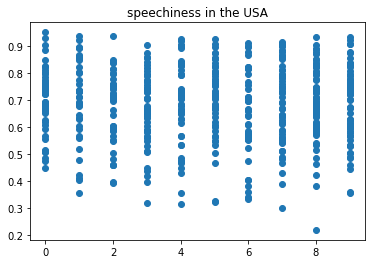

<AxesSubplot:xlabel='rank', ylabel='speechiness'>

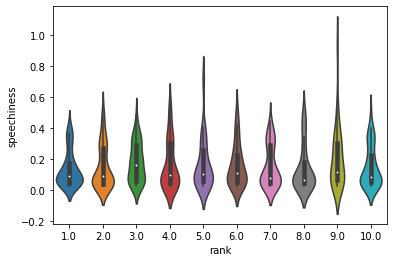

In [418]:
plot(america_df_final, "speechiness in the USA","speechiness")
sns.violinplot(x= "rank", y = "speechiness", data = america_df_final)



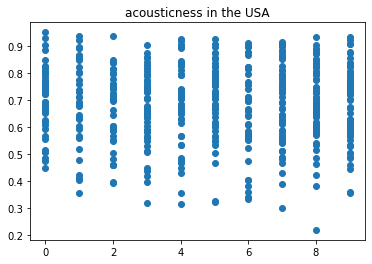

<AxesSubplot:xlabel='rank', ylabel='acousticness'>

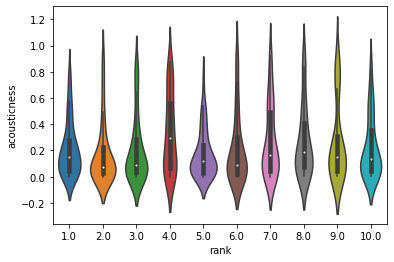

In [419]:
plot(america_df_final, "acousticness in the USA","acousticness")
sns.violinplot(x= "rank", y = "acousticness", data = america_df_final)



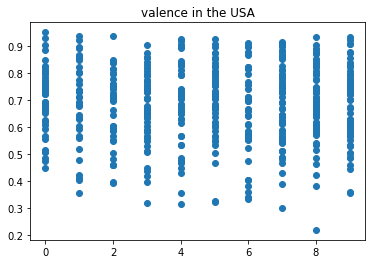

<AxesSubplot:xlabel='rank', ylabel='valence'>

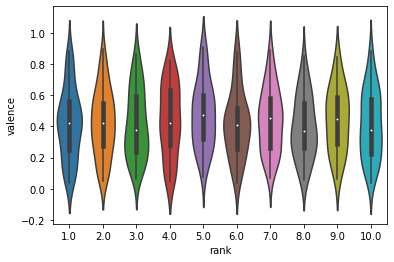

In [420]:
plot(america_df_final, "valence in the USA","valence")
sns.violinplot(x= "rank", y = "valence", data = america_df_final)



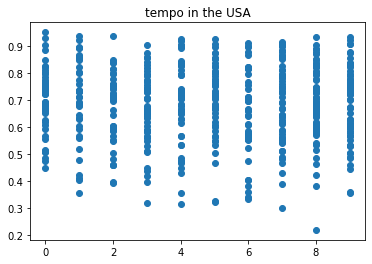

<AxesSubplot:xlabel='rank', ylabel='tempo'>

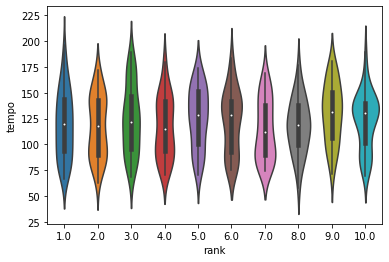

In [421]:
plot(america_df_final, "tempo in the USA","tempo")
sns.violinplot(x= "rank", y = "tempo", data = america_df_final)

entered


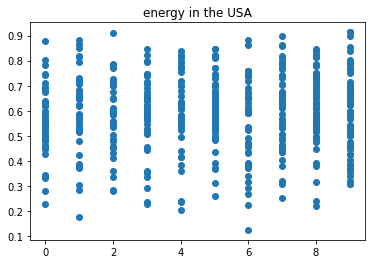

<AxesSubplot:xlabel='rank', ylabel='energy'>

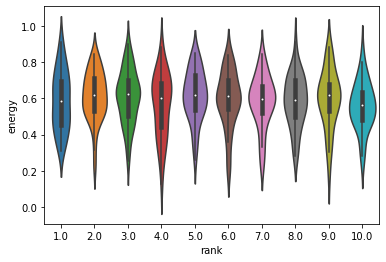

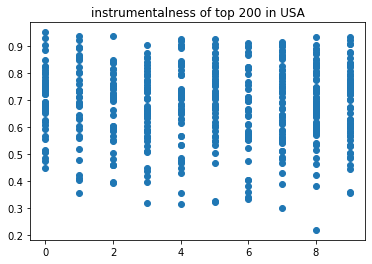

<AxesSubplot:xlabel='rank', ylabel='instrumentalness'>

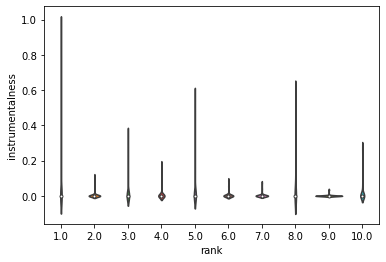

In [412]:
plot(america_df_final, "liveliness of top 200 in USA","instrumentalness")
sns.violinplot(x= "rank", y = "liveliness", data = america_df_final)

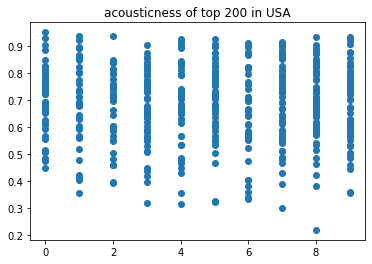

<AxesSubplot:xlabel='rank', ylabel='acousticness'>

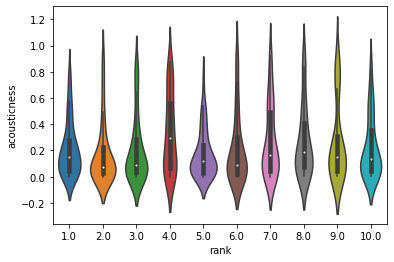

In [413]:
plot(america_df_final, "acousticness of top 200 in USA","acousticness")
sns.violinplot(x= "rank", y = "acousticness", data = america_df_final)

In [ ]:
plot(america_df_final, "acousticness of top 200 in USA","acousticness")
sns.violinplot(x= "rank", y = "acousticness", data = america_df_final)

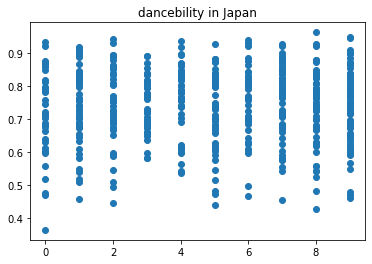

<AxesSubplot:xlabel='rank', ylabel='energy'>

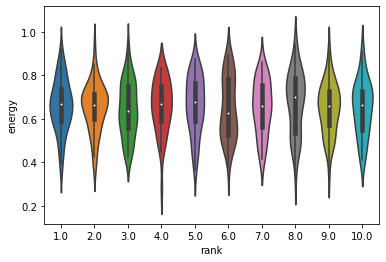

In [273]:
spoof = pd.read_csv("german.csv")
german_df_final = pd.DataFrame(spoof).sample(500)
draw_linear_reg(german_df_final, "dancebility in Japan","danceability")
sns.violinplot(x= "rank", y = "energy", data = german_df_final)

In [274]:
japan_df_final

NameError: name 'japan_df_final' is not defined

In [ ]:
draw_linear_reg(german_df_final, "loudness in Japan","loudness")
sns.violinplot(x= "rank", y = "loudness", data = german_df_final)

In [ ]:
draw_linear_reg(german_df_final, "energy in Japan","energy")
sns.violinplot(x= "rank", y = "energy", data = german_df_final)

In [ ]:
draw_linear_reg(german_df_final, "speechiness in Japan","energy")
sns.violinplot(x= "rank", y = "speechiness", data = german_df_final)

In [275]:
draw_linear_reg(japan_df_final, "instrumentalness in Japan","energy")
sns.violinplot(x= "rank", y = "instrumentalness", data = german_df_final)

NameError: name 'japan_df_final' is not defined

In [276]:
#10 lines
import seaborn as sns
def getDistributions(df, region, attribute):
    fig, ax = plt.subplots()
    if (attribute == "energy"):
        sns.distplot( df.energy)
    elif (attribute == "danceability"):
        sns.distplot( df.danceability)
        sns.distplot( df.danceability)
 
    elif (attribute == "loudness"):
        X = np.array(df["loudness"].values).reshape(-1,1)  
        sns.distplot( df.loudness)
    elif (attribute == "speechiness"):
        X = np.array(df["speechiness"].values).reshape(-1,1)  
        sns.distplot( df.speechiness)
        
    elif (attribute == "instrumentalness"):
        X = np.array(df["instrumentalness"].values).reshape(-1,1)  
        sns.distplot( df.instrumentalness)
    else:
        X = np.array(df["loudness"].values).reshape(-1,1)  
        sns.distplot( df.loudness)

In [277]:
np.np.corrcoef(

SyntaxError: incomplete input (288090637.py, line 1)

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

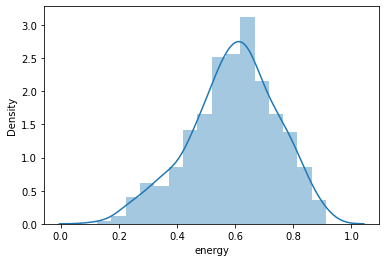

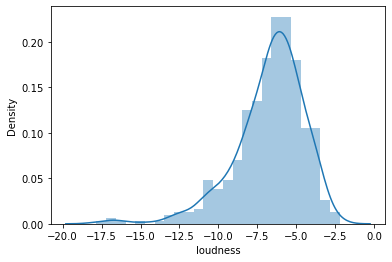

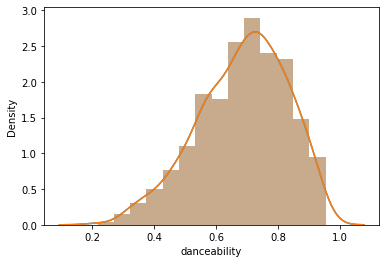

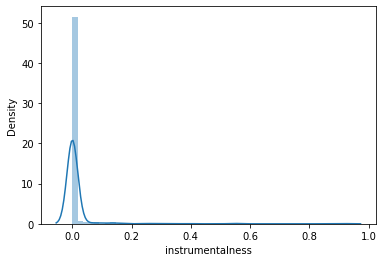

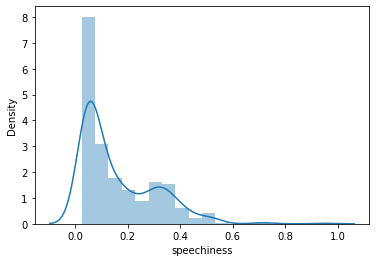

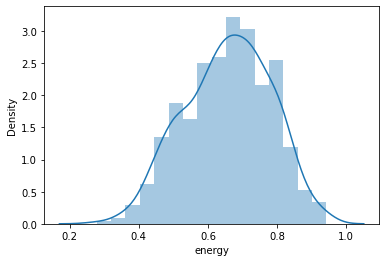

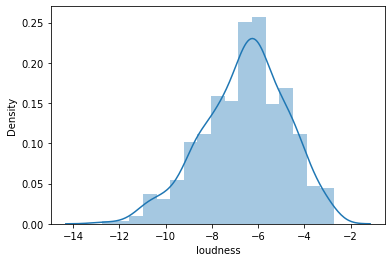

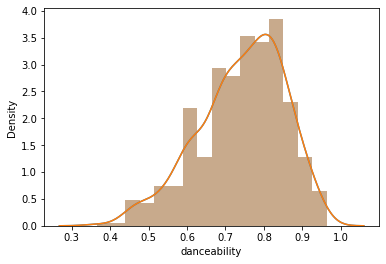

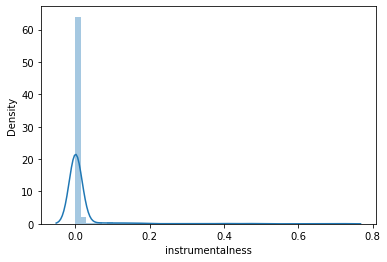

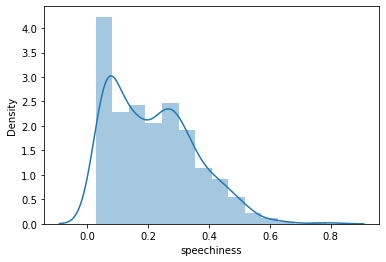

In [278]:
getDistributions(america_df_final, "energy in the USA","energy")
getDistributions(america_df_final, "energy in the USA","loudness")
getDistributions(america_df_final, "energy in the USA","danceability")
getDistributions(america_df_final, "energy in the USA","instrumentalness")
getDistributions(america_df_final, "energy in the USA","speechiness")
getDistributions(german_df_final, "energy in the USA","energy")
getDistributions(german_df_final, "energy in the USA","loudness")
getDistributions(german_df_final, "energy in the USA","danceability")
getDistributions(german_df_final, "energy in the USA","instrumentalness")
getDistributions(german_df_final, "energy in the USA","speechiness")

In [279]:
def getCorrelation(df):
    df2 = df.copy()
    corr_matrix = df.corr()
    fig,ax = (plt.subplots())
    sns.heatmap(corr_matrix, annot = True, linewidth = .5, ax = ax)

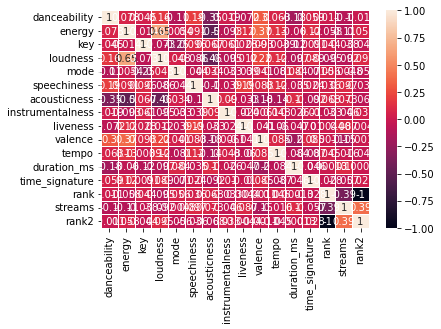

In [280]:
getCorrelation(america_df_final)

In [281]:
american_slice = america_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2"]]
german_slice = german_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2"]]


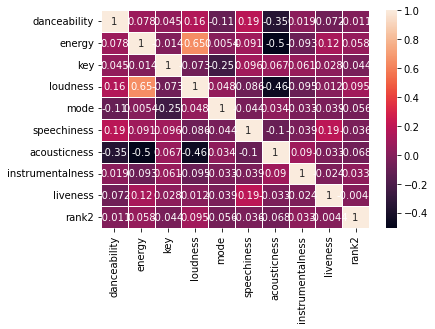

In [282]:
getCorrelation(american_slice)

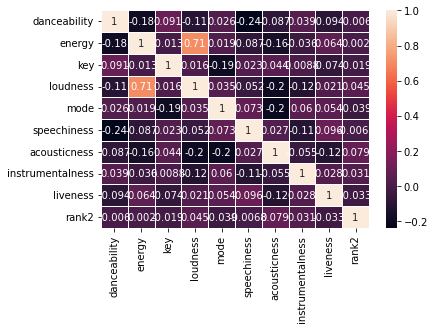

In [283]:
getCorrelation(german_slice)


In [ ]:
newMatrix = np.corrcoef(american_slice, german_slice)
fig,ax = (plt.subplots())
sns.heatmap(newMatrix, annot = True, linewidth = .5, ax = ax)

In [284]:
def compareAttr(df, name, name2):
   
    if (name == "danceability"):
        X = np.array(df["danceability"].values).reshape(-1,1)
    elif (name == "energy"):
        X = np.array(df["energy"].values).reshape(-1,1)  
    elif (name == "loudness"):
        X = np.array(df["loudness"].values).reshape(-1,1)  
    elif (name == "speechiness"):
        X = np.array(df["speechiness"].values).resphape(-1,1)
    elif (name == "instrumentalness"):
        X = np.array(df["instrumentalness"].values).reshape(-1,1)
    else:
        X = np.array(df["danceability"].values).reshape(-1,1)
    
    if (name2 == "danceability"):
        Y = np.array(df["danceability"].values).reshape(-1,1)
    elif (name2 == "energy"):
        Y = np.array(df["energy"].values).reshape(-1,1)  
    elif (name2 == "loudness"):
        print("entered loudness")
        Y = np.array(df["loudness"].values).reshape(-1,1)  
    elif (name2 == "speechiness"):
        Y = np.array(df["speechiness"].values).reshape(-1,1)
    elif (name2 == "instrumentalness"):
        Y = np.array(df["instrumentalness"].values).reshape(-1,1)
    else:
        Y = np.array(df["danceability"].values).reshape(-1,1)
    
    plt.scatter(X,Y)
    plt.title("choop")
    plt.show()

In [285]:
def comparePopularityPerAttribute(df, df2, attribute):
plt.figure(figsize=(8,6))
plt.hist(data1.attribute, bins=100, alpha=0.5, label="data1")
plt.hist(data2.attribute2, bins=100, alpha=0.5, label="data2")

IndentationError: expected an indented block after function definition on line 1 (3442019521.py, line 2)

In [ ]:
#	danceability	energy	key	loudness	mode	speechiness	acousticness	instrumentalness	liveness	valence	tempo	

#draw_linear_reg(unitedStatesDf, "dancebility in the USA","danceability")
print(unitedStatesDf["danceability"])
compareAttr(df2, "danceability", "energy") 
compareAttr(df2, "danceability", "loudness") 
compareAttr(df2, "danceability", "speechiness") 
compareAttr(df2, "danceability", "instrumentalness") 

In [ ]:
compareAttr(JapanDf, "dancebility", "energy") 

In [ ]:
compareAttr(MexicoDf, "dancebility", "energy") 

In [ ]:
compareAttr(unitedStatesDf, "dancebility", "energy") 

In [ ]:
draw_linear_reg(JapanDf, "dancebility in Japan","danceability")



In [ ]:
draw_linear_reg(unitedStatesDf, "energy in USA","energy")


In [ ]:
draw_linear_reg(JapanDf, "energy in Japan","energy")


In [ ]:
draw_linear_reg(JapanDf, "energy in Japan","loudness")

In [ ]:
draw_linear_reg(unitedStatesDf, "loudness in USA","loudness")

In [ ]:
df2 = top10000[top10000["rank"] <= 10]

In [ ]:
top10000[top10000["rank"] <= 50]

In [ ]:
unitedStatesDf = getFirstRandomN(df2, "United States", 100)
JapanDf = getFirstRandomN(df2, "Japan", 100)
#FranceDf = getFirstRandomN(df2, "United Kingdom", 100)

In [286]:
def get_genre(df):
    
    for index,element in df.iterrows():
        #url = element["url"]
        artistName = element["artist"]
        result = sp.search(artistName)
        track = result['tracks']['items'][0]
        artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    
        if (artist["genres"]):
            genre = artist["genres"][0]
            if (len(genre) >=3):
                if ("pop" in genre):
                    genre = "pop"
                elif ("rock" in genre):
                    genre = "rock"
                elif ("rap" in genre):
                    genre = "rap"  
                elif ("metal" in genre):
                    genre = "rap"  
                elif ("country" in genre):
                    genre = "rap"  
                elif ("rap" in genre):
                    genre = "rap"  
                elif ("electronic" in genre):
                    genre = "electronic"  
                elif ("hop" in genre):   
                    genre = "hip hop"
            df.iloc[index, df.columns.get_loc('genre')] = genre
        
   

In [171]:
america_df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,artist,title,date,chart,trend,streams,region,rank2,genre,False
0,0.575,0.619,0,-6.663,1,0.3220,0.02080,0.000000,0.1030,0.296,...,Juice WRLD,Feline (with Polo G & Trippie Redd),2021-12-10,top200,NEW_ENTRY,1326863.0,United States,7.0,NaN,pop
1,0.755,0.575,4,-8.392,0,0.0673,0.04430,0.001270,0.2760,0.493,...,Drake,Mob Ties,2018-06-29,top200,NEW_ENTRY,3859100.0,United States,3.0,NaN,pop
2,0.703,0.680,9,-6.118,0,0.0431,0.01710,0.000000,0.1780,0.536,...,Adele,Can I Get It,2021-11-19,top200,NEW_ENTRY,1871604.0,United States,4.0,NaN,pop
3,0.842,0.556,8,-6.793,1,0.4420,0.15900,0.000000,0.2040,0.306,...,Lil Uzi Vert,You Better Move,2020-03-06,top200,NEW_ENTRY,1937471.0,United States,2.0,NaN,pop
4,0.599,0.667,7,-4.267,1,0.0367,0.05330,0.000000,0.1340,0.817,...,"DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",I'm the One,2017-05-01,top200,NEW_ENTRY,2378884.0,United States,8.0,NaN,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,...,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),2021-03-19,top200,NEW_ENTRY,2181089.0,United States,9.0,NaN,pop
496,0.584,0.557,6,-6.371,1,0.0342,0.01290,0.000000,0.0576,0.767,...,Taylor Swift,I Knew You Were Trouble (Taylor's Version),2021-11-12,top200,NEW_ENTRY,2058912.0,United States,5.0,NaN,pop
497,0.646,0.899,6,-2.232,1,0.2980,0.03370,0.000000,0.2320,0.685,...,Drake,Omertà,2019-06-15,top200,NEW_ENTRY,1230180.0,United States,7.0,NaN,pop
498,0.897,0.366,0,-8.029,1,0.0569,0.00889,0.000353,0.0715,0.416,...,Taylor Swift,I Think He Knows,2019-08-23,top200,NEW_ENTRY,1742761.0,United States,5.0,NaN,pop


In [287]:
america_df_final["genre"] = np.nan
check = america_df_final.copy()
america_df_final.reset_index(drop = True, inplace = True)

german_df_final["genre"] = np.nan
german_df_final.reset_index(drop = True, inplace = True)

In [173]:
america_df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,artist,title,date,chart,trend,streams,region,rank2,genre,False
0,0.575,0.619,0,-6.663,1,0.3220,0.02080,0.000000,0.1030,0.296,...,Juice WRLD,Feline (with Polo G & Trippie Redd),2021-12-10,top200,NEW_ENTRY,1326863.0,United States,7.0,NaN,pop
1,0.755,0.575,4,-8.392,0,0.0673,0.04430,0.001270,0.2760,0.493,...,Drake,Mob Ties,2018-06-29,top200,NEW_ENTRY,3859100.0,United States,3.0,NaN,pop
2,0.703,0.680,9,-6.118,0,0.0431,0.01710,0.000000,0.1780,0.536,...,Adele,Can I Get It,2021-11-19,top200,NEW_ENTRY,1871604.0,United States,4.0,NaN,pop
3,0.842,0.556,8,-6.793,1,0.4420,0.15900,0.000000,0.2040,0.306,...,Lil Uzi Vert,You Better Move,2020-03-06,top200,NEW_ENTRY,1937471.0,United States,2.0,NaN,pop
4,0.599,0.667,7,-4.267,1,0.0367,0.05330,0.000000,0.1340,0.817,...,"DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",I'm the One,2017-05-01,top200,NEW_ENTRY,2378884.0,United States,8.0,NaN,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,...,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),2021-03-19,top200,NEW_ENTRY,2181089.0,United States,9.0,NaN,pop
496,0.584,0.557,6,-6.371,1,0.0342,0.01290,0.000000,0.0576,0.767,...,Taylor Swift,I Knew You Were Trouble (Taylor's Version),2021-11-12,top200,NEW_ENTRY,2058912.0,United States,5.0,NaN,pop
497,0.646,0.899,6,-2.232,1,0.2980,0.03370,0.000000,0.2320,0.685,...,Drake,Omertà,2019-06-15,top200,NEW_ENTRY,1230180.0,United States,7.0,NaN,pop
498,0.897,0.366,0,-8.029,1,0.0569,0.00889,0.000353,0.0715,0.416,...,Taylor Swift,I Think He Knows,2019-08-23,top200,NEW_ENTRY,1742761.0,United States,5.0,NaN,pop


In [174]:
america_df_final.index

RangeIndex(start=0, stop=500, step=1)

In [289]:


get_genre(america_df_final)


In [291]:
america_df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,rank,artist,title,date,chart,trend,streams,region,rank2,genre
0,0.902,0.819,1,-3.321,1,0.3160,0.04100,0.000000,0.1060,0.745,...,3.0,Lil Wayne,Let It Fly (feat. Travis Scott),2018-09-28,top200,NEW_ENTRY,3532426.0,United States,7.0,hip hop
1,0.713,0.605,11,-7.487,1,0.1070,0.49700,0.000003,0.1150,0.432,...,4.0,Pop Smoke,Aim For The Moon (feat. Quavo),2020-07-03,top200,NEW_ENTRY,1123896.0,United States,6.0,brooklyn drill
2,0.679,0.516,0,-6.371,0,0.0452,0.19900,0.000000,0.0965,0.716,...,5.0,"SZA, The Neptunes, Pharrell Williams, Ty Dolla...",Hit Different,2020-09-04,top200,NEW_ENTRY,1106414.0,United States,5.0,pop
3,0.726,0.769,6,-5.043,1,0.1230,0.02930,0.010100,0.1040,0.733,...,6.0,"French Montana, Swae Lee",Unforgettable,2017-06-30,top200,NEW_ENTRY,1175832.0,United States,4.0,rap
4,0.621,0.730,5,-5.414,0,0.1070,0.09670,0.000131,0.6730,0.464,...,5.0,"Tyler, The Creator",NEW MAGIC WAND,2019-05-17,top200,NEW_ENTRY,1537094.0,United States,5.0,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.357,0.238,8,-16.780,0,0.2650,0.14200,0.085900,0.5500,0.494,...,6.0,Kendrick Lamar,BLOOD.,2017-04-14,top200,NEW_ENTRY,2439181.0,United States,4.0,hip hop
496,0.360,0.391,6,-10.600,1,0.0528,0.29600,0.000406,0.1290,0.162,...,4.0,"Tyler, The Creator",RUNNING OUT OF TIME,2019-05-17,top200,NEW_ENTRY,1619002.0,United States,6.0,hip hop
497,0.777,0.658,0,-5.191,1,0.0540,0.07670,0.000000,0.0901,0.633,...,2.0,Taylor Swift,The Man,2019-08-23,top200,NEW_ENTRY,2405751.0,United States,8.0,pop
498,0.831,0.502,10,-4.045,0,0.0460,0.10100,0.000000,0.1220,0.101,...,1.0,Drake,Money In The Grave (Drake ft. Rick Ross),2019-06-15,top200,NEW_ENTRY,1791045.0,United States,9.0,hip hop


In [292]:
get_genre(german_df_final)

In [298]:
german_df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,rank,artist,title,date,chart,trend,streams,region,rank2,genre
0,0.545,0.942,0,-4.283,0,0.0417,0.00108,0.024600,0.0585,0.365,...,8.0,Rammstein,ZEIG DICH,2019-05-17,top200,NEW_ENTRY,471161.0,Germany,2.0,rap
1,0.738,0.706,4,-4.839,0,0.2980,0.26200,0.000000,0.1610,0.541,...,2.0,Capital Bra,Einsam an der Spitze,2020-09-18,top200,NEW_ENTRY,719478.0,Germany,8.0,hip hop
2,0.881,0.584,11,-5.931,0,0.3550,0.15500,0.000004,0.1180,0.363,...,5.0,Luciano,Im Film,2019-07-19,top200,NEW_ENTRY,561826.0,Germany,5.0,classical
3,0.690,0.672,1,-5.726,0,0.2230,0.69500,0.000016,0.2240,0.549,...,1.0,"Samra, Capital Bra",Berlin,2020-03-13,top200,NEW_ENTRY,786945.0,Germany,9.0,hip hop
4,0.771,0.731,3,-5.387,0,0.0534,0.23700,0.000035,0.2170,0.844,...,4.0,"Eno, Nimo",Kommunikation,2020-01-24,top200,NEW_ENTRY,714302.0,Germany,6.0,german drill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.768,0.943,9,-2.875,1,0.1270,0.21900,0.000001,0.1150,0.822,...,8.0,"Azet, RAF Camora",Qa bone,2017-12-27,top200,NEW_ENTRY,210769.0,Germany,2.0,hip hop
496,0.741,0.573,5,-7.531,0,0.2620,0.26800,0.000000,0.1710,0.529,...,6.0,"Shindy, OZ",Morning Sun,2020-08-28,top200,NEW_ENTRY,468761.0,Germany,4.0,hip hop
497,0.803,0.834,6,-6.186,1,0.0455,0.02000,0.121000,0.1030,0.850,...,4.0,Juju,Vertrau mir,2020-07-17,top200,NEW_ENTRY,610837.0,Germany,6.0,NaN
498,0.630,0.692,7,-4.951,0,0.4270,0.27500,0.000000,0.1670,0.820,...,2.0,"Capital Bra, Samra",Wir ticken,2019-03-15,top200,NEW_ENTRY,1047001.0,Germany,8.0,hip hop


In [299]:
check = america_df_final.copy()
check2 = german_df_final.copy()

In [300]:
america_df_final [np.asarray(america_df_final["genre"]) == False]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,rank,artist,title,date,chart,trend,streams,region,rank2,genre


In [301]:
us_genre_df

In [302]:
us_genre_df

['choop' 'zoop']
{'german drill', nan, nan, 'turbo folk', 'cologne indie', nan, 'classical', nan, nan, 'pop', nan, nan, nan, 'rap', nan, nan, nan, nan, 'banda', nan, 'lo-fi vgm', 'waiata mo tamariki', 'alternative dance', 'francoton', 'latin', nan, nan, nan, nan, nan, 'british soul', 'corrido', nan, nan, 'hip hop', 'electronic', 'alt z', 'electro house', nan, 'opm', nan, nan, nan, 'partyschlager', nan, 'rock', nan, nan}


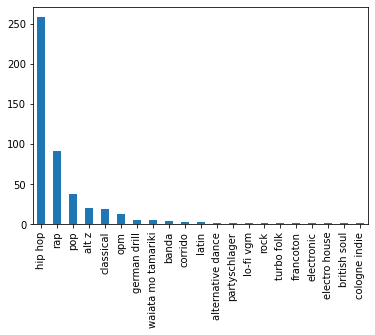

In [305]:
genreDistribution(german_df_final)

['choop' 'zoop']
{'hip hop', 'latin', 'brostep', 'alt z', 'edm', 'brooklyn drill', 'rap', nan, 'dark clubbing', 'permanent wave', 'chicago drill', 'british soul', 'alternative r&b', 'canadian contemporary r&b', 'pop'}


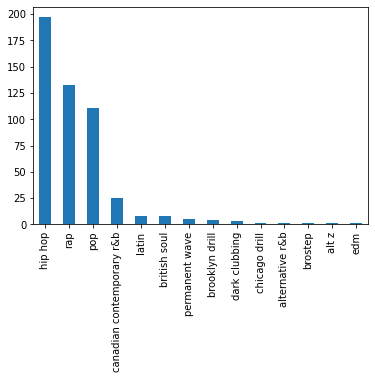

In [307]:
genreDistribution(america_df_final)

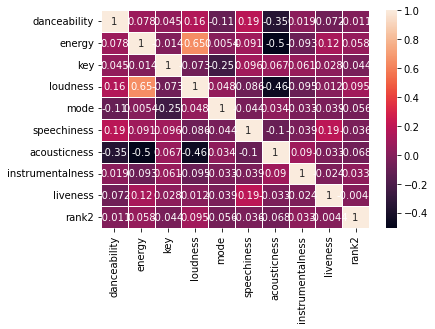

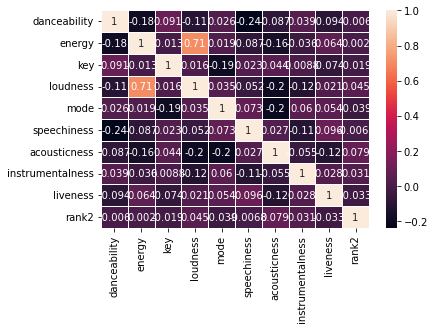

In [309]:
american_slice2 = america_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2", "genre"]]
german_slice2 = german_df_final[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness", "rank2", "genre"]]
getCorrelation(american_slice2)
getCorrelation(german_slice2)

In [315]:
def plot_regression(df):
    fig, ax = plt.subplots(figsize = (10,10))
    sns.regplot(x=df.acousticness,y=df.energy, ax=ax).set_title('Acoustics of a Song Versus the Energy Level',fontsize=15)
    plt.xlabel('Acoustics',fontsize=12);
    plt.ylabel('Energy Level',fontsize=12);                       

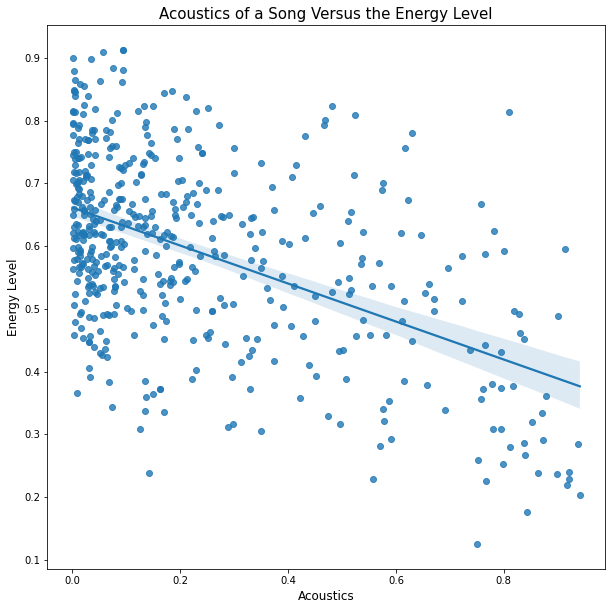

In [316]:
plot_regression(america_df_final)

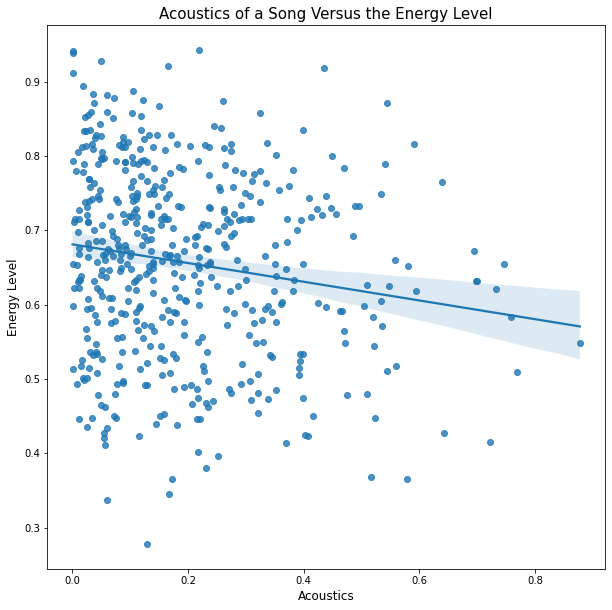

In [317]:
plot_regression(german_df_final)

In [402]:

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn.metrics as met
from sklearn import tree
import sklearn.model_selection as ms
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
appended = german_df_final.append(america_df_final)
appended['region_type'] = appended['region'].astype('category')
appended['region_Cat'] = appended['region_type'].cat.codes
appended = shuffle(appended)

ind = appended[  ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness"]]
         

print(ind)
dep = pd.Categorical.from_codes(np.asarray(appended.region_Cat), np.unique(np.asarray(appended.region_type)))
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, random_state=42)

#appended_porcessed
#dep = pd.Categorical.from_codes(appended["region"])   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
294         0.868   0.676   11    -6.957     1       0.2890        0.0806   
299         0.918   0.508    8    -5.737     1       0.3570        0.1690   
213         0.594   0.676    2    -5.808     1       0.3440        0.1350   
56          0.861   0.656    4    -7.867     0       0.4250        0.1040   
318         0.670   0.700    1    -7.893     1       0.1960        0.5760   
..            ...     ...  ...       ...   ...          ...           ...   
198         0.580   0.653    5    -3.818     1       0.0745        0.4470   
494         0.505   0.657   11    -5.240     0       0.0318        0.3730   
308         0.670   0.928    0    -3.608     1       0.0443        0.0504   
9           0.320   0.734   10    -4.021     1       0.0331        0.1330   
382         0.667   0.616    1    -8.799     1       0.1620        0.1400   

     instrumentalness  liveness  
294          0.000000    0.0933  
299    

/tmp/ipykernel_3385/1675319784.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended = german_df_final.append(america_df_final)


In [403]:
dt = DecisionTreeClassifier()
dt.fit(ind_train, dep_train)
predicted = dt.predict(ind_test)

actual = np.array(dep_test)
predictions = np.array(predicted)
matrix = met.confusion_matrix(actual, predictions)
acc =  (matrix[0][0] + matrix[1][1] ) / sum(list(map(sum, matrix)))                  
print("Accuracy:", acc)

Accuracy: 0.556


In [404]:
parameters = {'n_estimators': [25,50,100,125,150,175,200,225,250], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10], 
              'min_samples_split': [2,3,4,5,6,7]}

ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, random_state=42)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv = 10, scoring='accuracy')

clf.fit(ind_train, dep_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 225}


In [408]:
dlf=RandomForestClassifier(criterion = clf.best_params_["criterion"],  max_depth = clf.best_params_["max_depth"],
                           min_samples_split = clf.best_params_["min_samples_split"], n_estimators = clf.best_params_["n_estimators"])
dlf.fit(ind_train, dep_train)
predict_ind = clf.predict(ind_test)
matrix = met.confusion_matrix(dep_test, predict_ind)
acc =  (matrix[0][0] + matrix[1][1] ) / sum(list(map(sum, matrix))) 
print("Accuracy:", acc)

Accuracy: 0.692
